In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [17]:
# Step 1: Load Data
# Replace 'your_data.csv' with your dataset file
file_path = '/content/student_data.csv'
student_data = pd.read_csv(file_path)

In [35]:
# Анализ пропущенных значений
missing_values = student_data.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)

Пропущенные значения в каждом столбце:
age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
school_GP            0
school_MS            0
sex_F                0
sex_M                0
address_R            0
address_U            0
famsize_GT3          0
famsize_LE3          0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_father      0
guardian_mother   

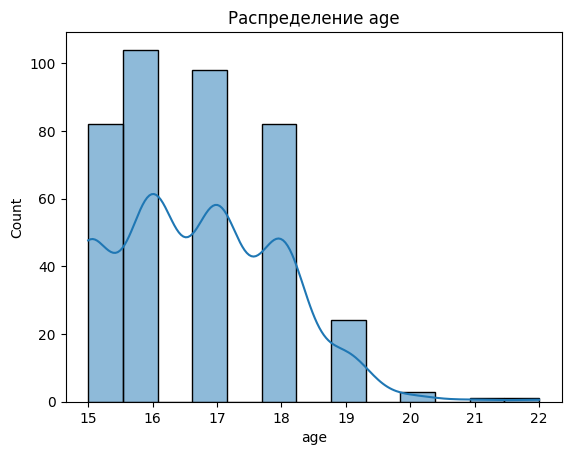

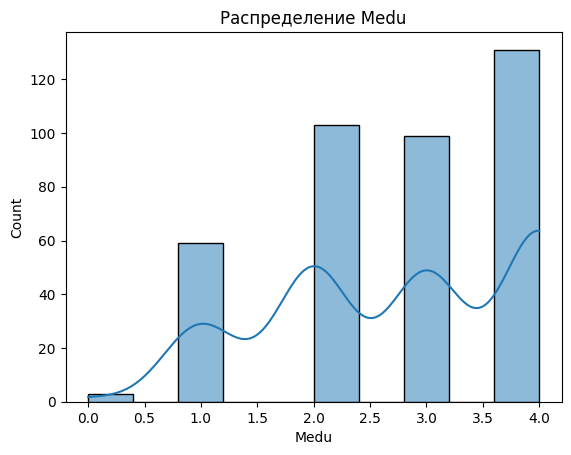

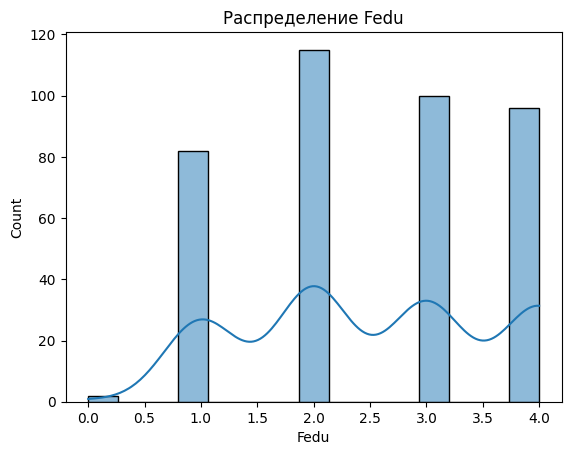

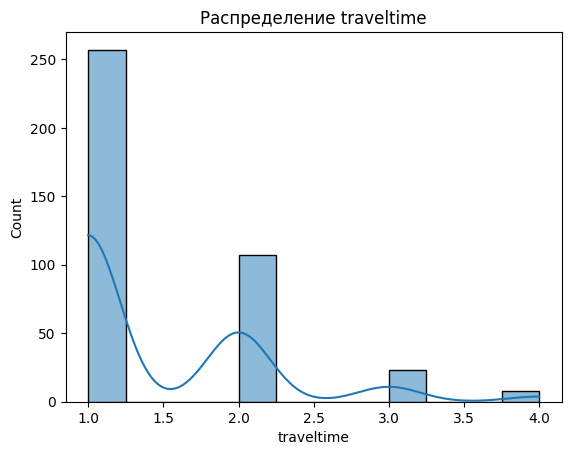

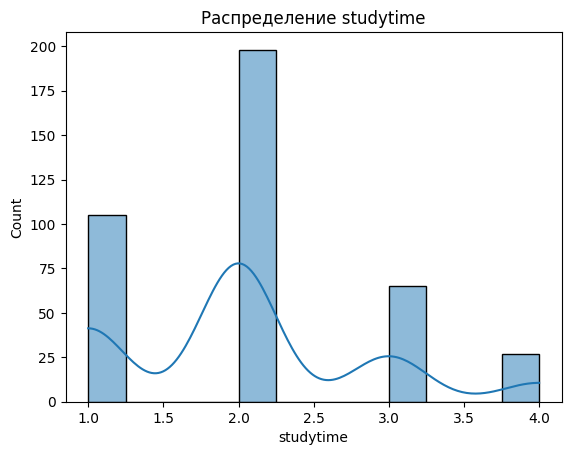

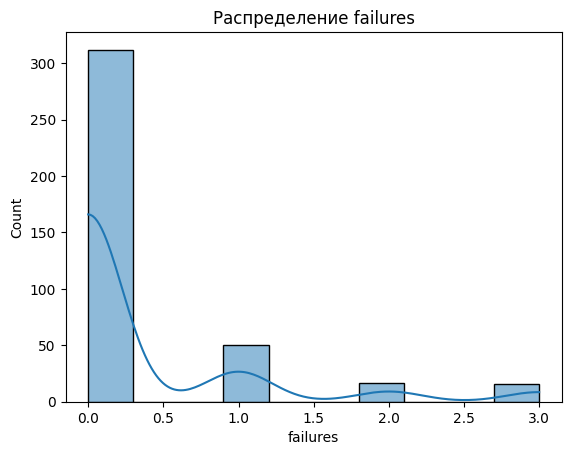

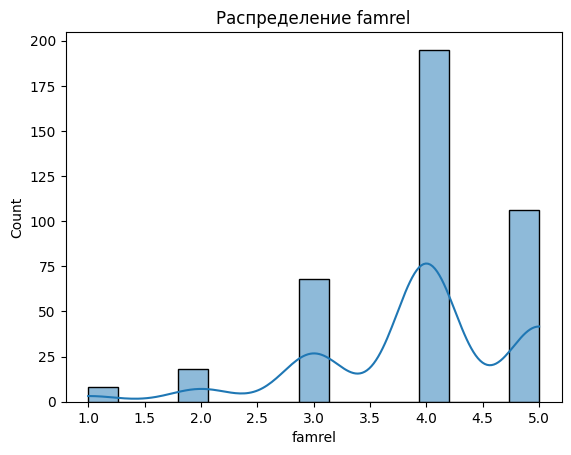

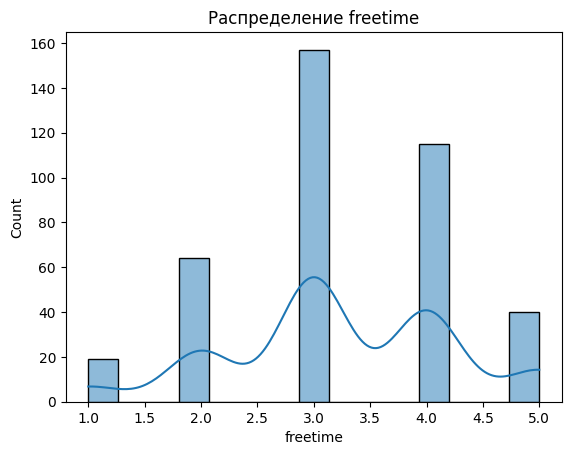

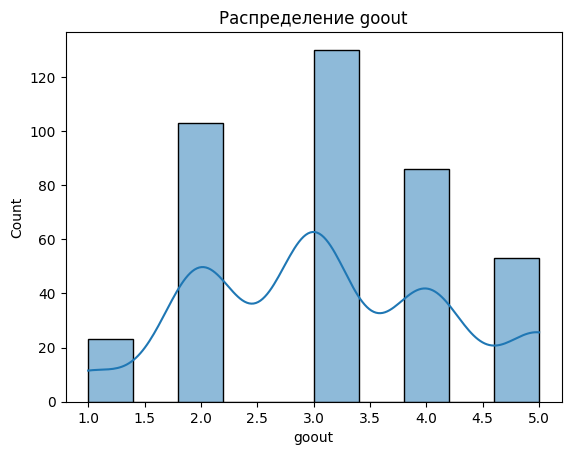

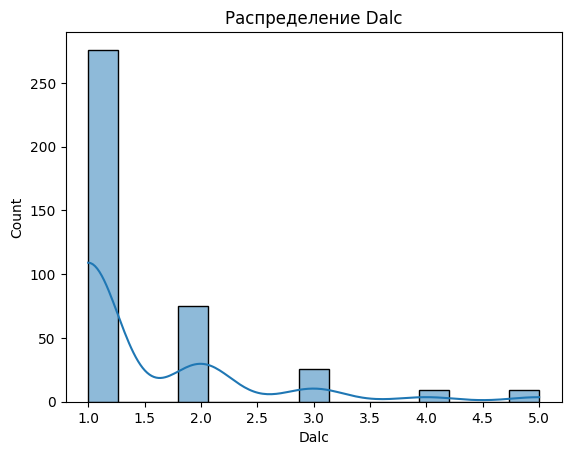

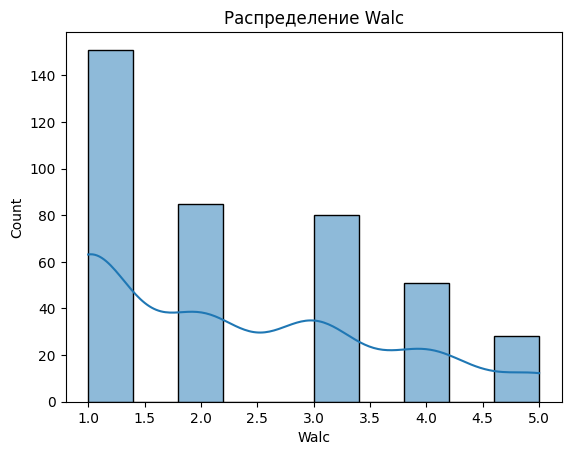

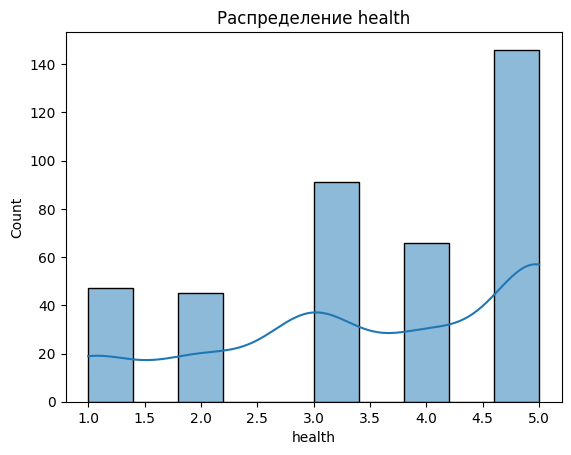

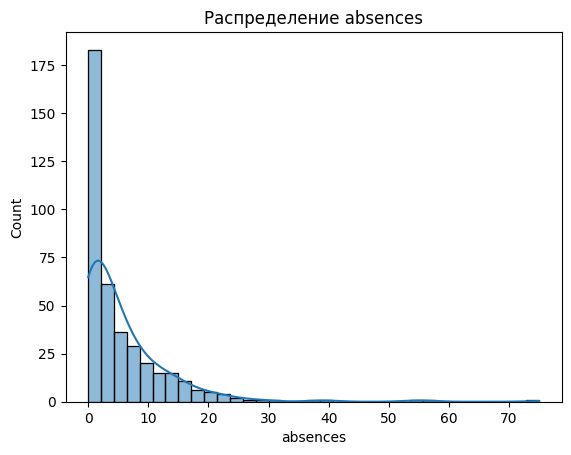

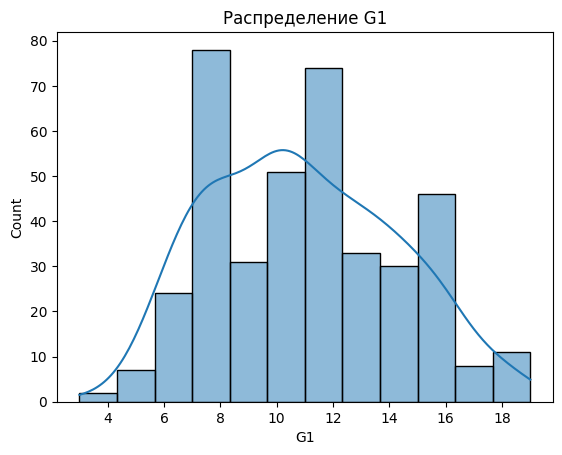

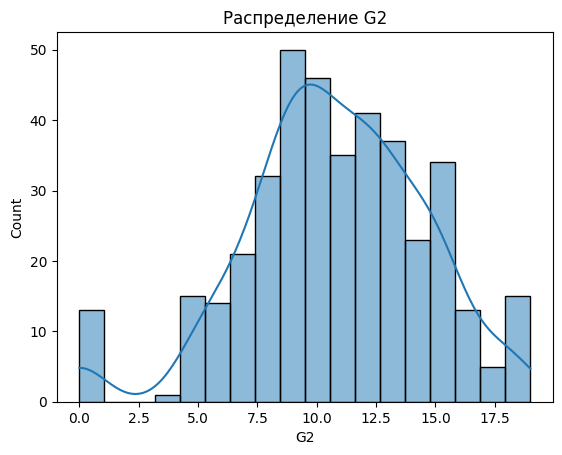

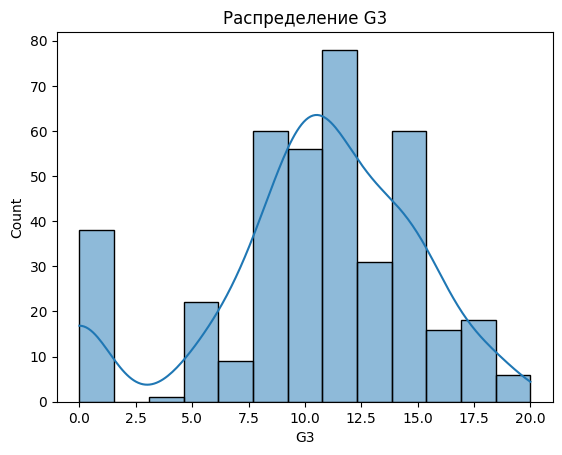

In [37]:
# Визуализация данных
# Гистограммы для числовых признаков
for column in student_data.select_dtypes(include=['float', 'int']).columns:
    plt.figure()
    sns.histplot(student_data[column], kde=True)
    plt.title(f'Распределение {column}')
    plt.show()

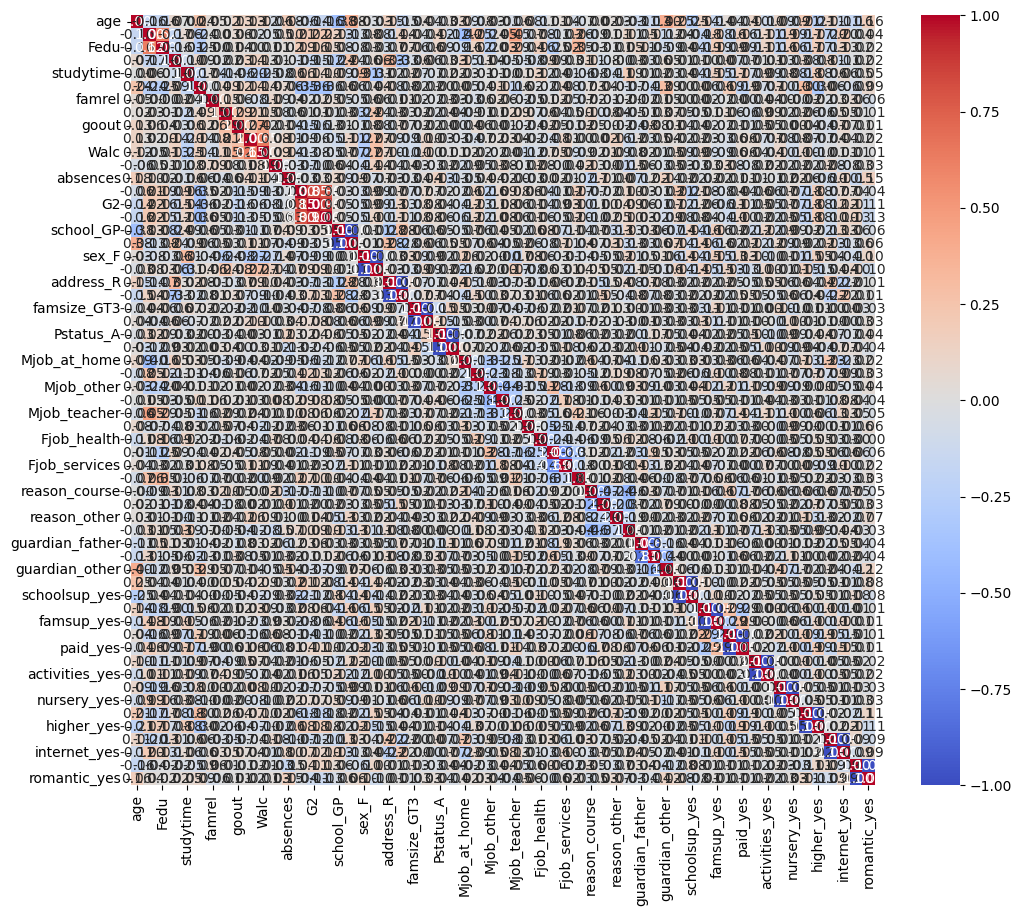

In [38]:
# Корреляционная тепловая карта
plt.figure(figsize=(12, 10))
sns.heatmap(student_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [39]:
# Преобразование категориальных данных в числовые
student_data = pd.get_dummies(student_data)

In [40]:
# Выбор признаков и целевой переменной
features = student_data.drop(columns=['G3'])
target = student_data['G3']

In [41]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [42]:
# Создание и обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Кросс-валидация модели
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Средняя оценка кросс-валидации: {cross_val_scores.mean()}")


Средняя оценка кросс-валидации: 0.905761468505306


In [44]:
# Прогнозирование и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Среднеквадратическая ошибка модели: {mse}")


Среднеквадратическая ошибка модели: 3.9925037974683546


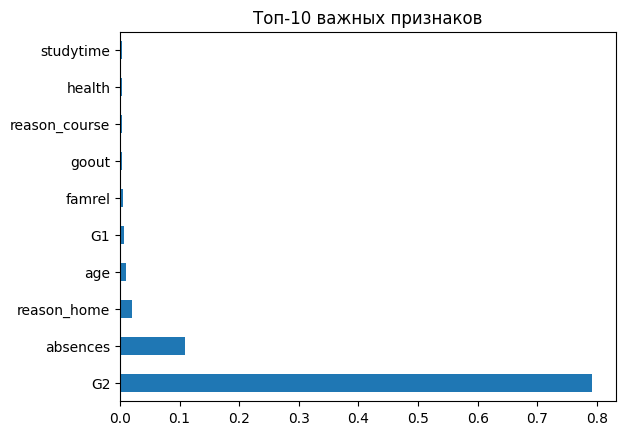

In [45]:
# Анализ важности признаков
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Топ-10 важных признаков")
plt.show()